In [1]:
from keras_wrapper.dataset import Dataset, saveDataset, loadDataset

import logging

logging.basicConfig(level=logging.DEBUG, format='[%(asctime)s] %(message)s', datefmt='%d/%m/%Y %H:%M:%S')

# Plot libraries
import matplotlib as mpl
mpl.use('Agg') # run matplotlib without X server (GUI)
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import misc
import numpy as np

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


# Create Dataset

In [2]:
# Build basic dataset structure
#    we assign it a name and the path were the images are stored
    
name = 'Flickr8k_ImageDescription'
ds = Dataset(name, '/media/HDD_2TB/DATASETS/Flickr8k/Flicker8k_Dataset')

## Set dataset outputs

In [3]:
max_text_len = 35

# Let's load the train, val and test splits of the descriptions (outputs)
#    the files include a description per line 
#    and a set of 5 consecutive descriptions correspond to a single input image
    
ds.setOutput('/media/HDD_2TB/DATASETS/Flickr8k/text/train_descriptions.txt', 'train',
               type='text', id='descriptions',
               tokenization='tokenize_basic', build_vocabulary=True, max_text_len=max_text_len)
ds.setOutput('/media/HDD_2TB/DATASETS/Flickr8k/text/val_descriptions.txt', 'val',
               type='text', id='descriptions',
               tokenization='tokenize_basic', max_text_len=max_text_len)
ds.setOutput('/media/HDD_2TB/DATASETS/Flickr8k/text/test_descriptions.txt', 'test',
               type='text', id='descriptions',
               tokenization='tokenize_basic', max_text_len=max_text_len)

## Set dataset inputs

In [4]:
# Let's load the associated images (inputs)
#    we must take into account that in this dataset we have 5 sentences per image, 
#    for this reason we introduce the parameter 'repeat_set'=5
    
ds.setInput('/media/HDD_2TB/DATASETS/Flickr8k/text/Flickr_8k.trainImages.txt', 'train',
               type='image', id='images', repeat_set=5)
ds.setInput('/media/HDD_2TB/DATASETS/Flickr8k/text/Flickr_8k.devImages.txt', 'val',
               type='image', id='images', repeat_set=5)
ds.setInput('/media/HDD_2TB/DATASETS/Flickr8k/text/Flickr_8k.testImages.txt', 'test',
               type='image', id='images', repeat_set=5)
    
# Now let's set the dataset mean image for preprocessing the data
ds.setTrainMean(mean_image=[122.6795, 116.6690, 104.0067], id='images')

## Save and Load Dataset instance

In [5]:
# We have finished loading the dataset, now we can store it for using it in the future
saveDataset(ds, 'Datasets')
    
# We can easily recover it with a single line
ds = loadDataset('Datasets/Dataset_'+name+'.pkl')

## Recover ready-to-train data and plot it

In [6]:
# Lets recover the first batch of data without being pre-processed (debug=True)
[X, Y] = ds.getXY('train', 9, debug=True)

# In this case our dataset only has 1 input and 1 output
print 'Inputs: '+ str(ds.ids_inputs)
print 'Outputs: '+ str(ds.ids_outputs)

# For this reason we can just keep the first element in each list
X = X[0]
Y = Y[0]
for x,y in zip(X,Y):
    print x +' : '+ y

Inputs: ['images']
Outputs: ['descriptions']
2513260012_03d33305cf.jpg : black dog is running after white dog in snow
2513260012_03d33305cf.jpg : black dog chasing brown dog through snow
2513260012_03d33305cf.jpg : 2 dogs chase each other across snowy ground
2513260012_03d33305cf.jpg : 2 dogs play together in snow
2513260012_03d33305cf.jpg : 2 dogs running through low lying body of water
2903617548_d3e38d7f88.jpg : little baby plays croquet
2903617548_d3e38d7f88.jpg : little girl plays croquet next to truck
2903617548_d3e38d7f88.jpg : child is playing croquette by truck
2903617548_d3e38d7f88.jpg : kid is in front of car with put and ball


In [7]:
def plot_data(train_imgs, annotations):
    num_show = 9
    per_row = 3
    max_len_line = 50
    
    # randomly chose some images
    chosen = range(num_show)

    n_rows = int(np.ceil(num_show/per_row))
    f = plt.figure(1)
    f.set_size_inches(5*n_rows, 5*per_row)
    for i,c in enumerate(chosen):
        im = train_imgs[c]
        im = np.transpose(im, (1, 2, 0))
        ax = plt.subplot(n_rows,per_row,i+1)
        plt.imshow(im)

        text = ''
        text += 'idx: %d\n' % c
        text += '\n'
        plt.xlabel(text)
        
        
        ann = str(annotations[c])
        print ('idx %d : %s') % (c, ann)

idx 0 : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  12   6   4  28 253  11   6   2  38]
idx 1 : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  12   6 258  22   6  29  38]
idx 2 : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  27 819 135  80 123 134 162]
idx 3 : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  10  27  78 138   2  38]
idx 4 : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  10  27  28  29 535 448 257   9  21]
idx 5 : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   36  131  108 2474]
idx 6 : [   0    0    0    0    0    0    0    0    0    0

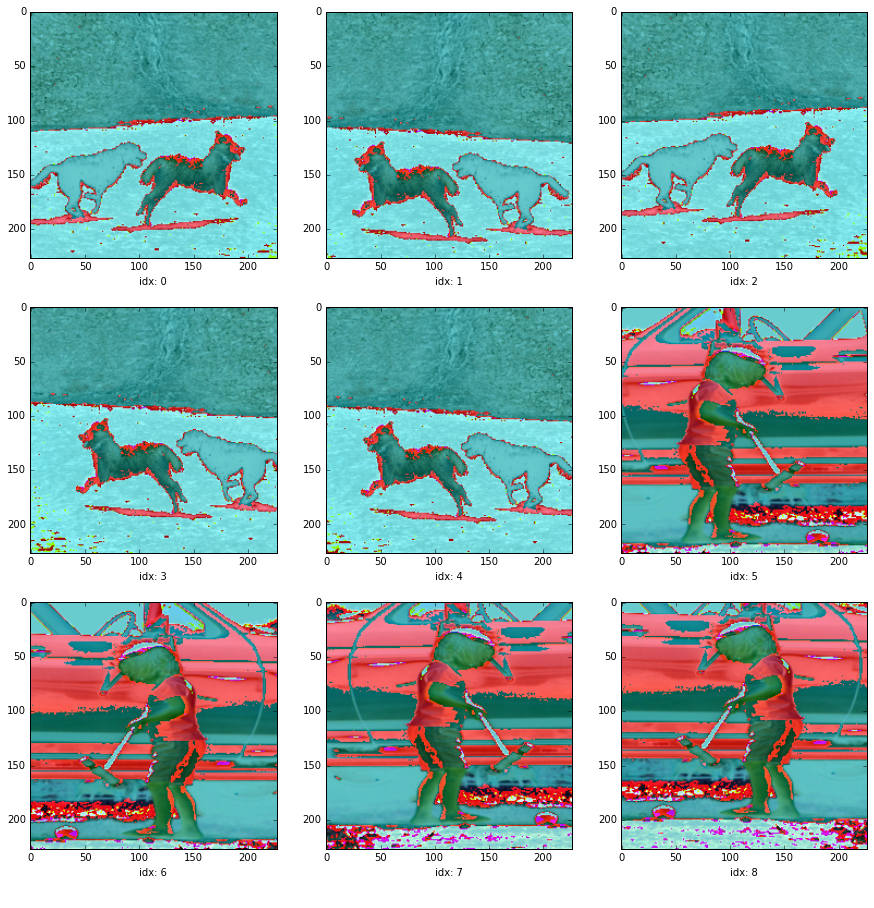

In [8]:
# And now we will recover the same set of samples but preprocessed (debug=False)

# First we reset the training set counters for recovering the same samples
ds.resetCounters('train')

# Samples pre-processed and ready to train a model
[X, Y] = ds.getXY('train', 10, normalization=False, meanSubstraction=True, dataAugmentation=True)

plot_data(X[0],Y[0])